In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, QED
import random

# Initial molecule pool (SMILES strings)
population = ["CCO", "CCC", "CCN", "C1=CC=CC=C1", "CC(C)O"]  # ethanol, propane, ethylamine, benzene, isopropanol

def fitness(smiles):
    """Calculate fitness using QED (Quantitative Estimation of Drug-likeness)."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return QED.qed(mol)
        else:
            return 0
    except:
        return 0

def mutate(smiles):
    """Random mutation: remove or add an atom (very naive)."""
    # Check if the input smiles string is empty
    if not smiles:
        return ""  # Return empty string if input is empty

    atoms = ['C', 'O', 'N', 'Cl', 'F']
    pos = random.randint(0, len(smiles)-1)
    if random.random() < 0.5:
        # Add random atom
        return smiles[:pos] + random.choice(atoms) + smiles[pos:]
    else:
        # Remove a character
        return smiles[:pos] + smiles[pos+1:]

def crossover(parent1, parent2):
    """Combine two SMILES strings."""
    cut1 = random.randint(0, len(parent1))
    cut2 = random.randint(0, len(parent2))
    child = parent1[:cut1] + parent2[cut2:]
    return child

def select(pop, k=5):
    """Select top-k molecules based on fitness."""
    scored = sorted(pop, key=fitness, reverse=True)
    return scored[:k]

# Genetic Algorithm
generations = 10
for gen in range(generations):
    print(f"Generation {gen}")
    new_pop = []
    selected = select(population)

    while len(new_pop) < len(population):
        # Ensure selected has at least 2 elements before sampling
        if len(selected) < 2:
            # Handle the case where selection resulted in less than 2 parents
            # For simplicity, we can just add the existing selected to new_pop
            # or regenerate the population differently.
            # Here, we'll just break the while loop to avoid infinite loop
            print("Warning: Not enough selected parents for crossover. Ending generation.")
            break

        parent1, parent2 = random.sample(selected, 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_pop.append(child)

    # Ensure population doesn't become empty if crossover/mutation fails repeatedly
    if not new_pop:
         print("Warning: New population is empty. Reverting to previous population.")
         # Optionally, you could try regenerating the population or adding initial molecules
    else:
        population = new_pop


# Print best molecule
# Handle the case where population might be empty
if population:
    best = max(population, key=fitness)
    print("Best SMILES:", best)
    print("QED score:", fitness(best))
else:
    print("Population is empty. Could not find the best molecule.")

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem, QED
import random

# Initial molecule pool (valid SMILES strings)
population = ["CCO", "CCC", "CCN", "C1=CC=CC=C1", "CC(C)O"]  # ethanol, propane, ethylamine, benzene, isopropanol

def fitness(smiles):
    """Calculate fitness using QED (Quantitative Estimation of Drug-likeness)."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return QED.qed(mol)
    except:
        pass
    return 0

def is_valid_smiles(smiles):
    """Check if SMILES can be parsed and is chemically valid."""
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

def mutate(smiles):
    """Random mutation: replace, insert, or delete a valid atom substring."""
    atoms = ['C', 'O', 'N', 'Cl', 'F']
    if not smiles:
        return ""

    # Try multiple times to get a valid mutation
    for _ in range(5):
        pos = random.randint(0, len(smiles))
        op = random.choice(['add', 'delete', 'replace'])

        if op == 'add':
            new_smiles = smiles[:pos] + random.choice(atoms) + smiles[pos:]
        elif op == 'delete' and len(smiles) > 1:
            new_smiles = smiles[:pos] + smiles[pos+1:]
        elif op == 'replace':
            new_smiles = (
                smiles[:pos]
                + random.choice(atoms)
                + smiles[pos+1:] if pos < len(smiles) else smiles
            )
        else:
            continue

        if is_valid_smiles(new_smiles):
            return new_smiles

    return smiles  # fallback

def crossover(parent1, parent2):
    """Combine two SMILES strings with random cut points."""
    if not parent1 or not parent2:
        return parent1 or parent2
    cut1 = random.randint(1, len(parent1)-1)
    cut2 = random.randint(1, len(parent2)-1)
    child = parent1[:cut1] + parent2[cut2:]
    return child if is_valid_smiles(child) else parent1

def select(pop, k=5):
    """Select top-k molecules based on fitness."""
    scored = sorted(pop, key=fitness, reverse=True)
    return scored[:k]

# Genetic Algorithm
generations = 10
for gen in range(generations):
    print(f"Generation {gen}")
    new_pop = []
    selected = select(population)

    if len(selected) < 2:
        print("Warning: Not enough selected parents for crossover. Reverting to initial pool.")
        population = ["CCO", "CCC", "CCN", "C1=CC=CC=C1", "CC(C)O"]
        continue

    while len(new_pop) < len(population):
        parent1, parent2 = random.sample(selected, 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        if is_valid_smiles(child):
            new_pop.append(child)

    if not new_pop:
        print("Warning: New population is empty. Reverting to previous population.")
    else:
        population = new_pop

# Print best molecule
if population:
    best = max(population, key=fitness)
    print("Best SMILES:", best)
    print("QED score:", fitness(best))
else:
    print("Population is empty. Could not find the best molecule.")


Generation 0
Generation 1
Generation 2
Generation 3
Generation 4


[22:47:18] SMILES Parse Error: extra close parentheses while parsing: CCC)O
[22:47:18] SMILES Parse Error: check for mistakes around position 4:
[22:47:18] CCC)O
[22:47:18] ~~~^
[22:47:18] SMILES Parse Error: Failed parsing SMILES 'CCC)O' for input: 'CCC)O'
[22:47:18] SMILES Parse Error: unclosed ring for input: 'CCCC=C1'
[22:47:18] Explicit valence for atom # 1 F, 2, is greater than permitted


ValueError: empty range for randrange() (1, 1, 0)

In [1]:
# Example: Representing a chromosome as a list of genes

# Let's say we are trying to solve a problem where each gene can be either 0 or 1.
# The length of the chromosome depends on the problem.

def create_random_chromosome(length):
  """
  Creates a random chromosome of a given length.

  Args:
    length: The desired length of the chromosome.

  Returns:
    A list representing the chromosome.
  """
  import random
  chromosome = [random.randint(0, 1) for _ in range(length)]
  return chromosome

# Example usage:
chromosome_length = 10
my_chromosome = create_random_chromosome(chromosome_length)
print(f"Generated chromosome: {my_chromosome}")

# In a real genetic algorithm, you would also need functions for:
# - Initial population generation (creating many chromosomes)
# - Fitness evaluation (how good is this chromosome?)
# - Selection (choosing the best chromosomes to reproduce)
# - Crossover (combining parts of two chromosomes to create new ones)
# - Mutation (randomly changing some genes in a chromosome)

# Example of a simple fitness function (for demonstration, not tied to a specific problem)
def simple_fitness(chromosome):
    """
    A simple example fitness function (e.g., counting the number of 1s).
    """
    return sum(chromosome)

# Example usage of fitness function
fitness_score = simple_fitness(my_chromosome)
print(f"Fitness score of the chromosome: {fitness_score}")

# Example of a simple crossover function (one-point crossover)
def one_point_crossover(parent1, parent2):
    """
    Performs one-point crossover between two parent chromosomes.
    """
    import random
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Example of crossover
parent1 = [1, 0, 1, 1, 0]
parent2 = [0, 1, 0, 1, 1]
child1, child2 = one_point_crossover(parent1, parent2)
print(f"Parent 1: {parent1}, Parent 2: {parent2}")
print(f"Child 1: {child1}, Child 2: {child2}")

# Example of a simple mutation function (bit flip mutation)
def bit_flip_mutation(chromosome, mutation_rate):
    """
    Performs bit-flip mutation on a chromosome.
    """
    import random
    mutated_chromosome = chromosome[:] # Create a copy
    for i in range(len(mutated_chromosome)):
        if random.random() < mutation_rate:
            mutated_chromosome[i] = 1 - mutated_chromosome[i] # Flip the bit (0 to 1, 1 to 0)
    return mutated_chromosome

# Example of mutation
original_chromosome = [1, 0, 1, 1, 0]
mutation_rate = 0.1 # 10% chance of a bit flipping
mutated_chromosome = bit_flip_mutation(original_chromosome, mutation_rate)
print(f"Original chromosome: {original_chromosome}")
print(f"Mutated chromosome: {mutated_chromosome}")

Generated chromosome: [0, 1, 1, 0, 1, 0, 0, 0, 1, 0]
Fitness score of the chromosome: 4
Parent 1: [1, 0, 1, 1, 0], Parent 2: [0, 1, 0, 1, 1]
Child 1: [1, 1, 0, 1, 1], Child 2: [0, 0, 1, 1, 0]
Original chromosome: [1, 0, 1, 1, 0]
Mutated chromosome: [1, 0, 0, 1, 0]


In [ ]:
import random

# PARAMETERS
REFERENCE = "ATGGAGACCACCGTGAACCGGACCTTGAGGCATACTTCAAA"
DNA_BASES = ['A', 'T', 'G', 'C']
POPULATION_SIZE = 100
GENERATIONS = 1000
MUTATION_RATE = 0.01

# Function to generate a random DNA sequence
def generate_random_dna(length):
    return ''.join(random.choice(DNA_BASES) for _ in range(length))

# Fitness function: number of matching characters
def fitness(individual):
    return sum(1 for a, b in zip(individual, REFERENCE) if a == b)

# Crossover two parents
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:]

# Mutate a DNA sequence
def mutate(sequence):
    return ''.join(
        base if random.random() > MUTATION_RATE else random.choice(DNA_BASES)
        for base in sequence
    )

# Generate initial population
population = [generate_random_dna(len(REFERENCE)) for _ in range(POPULATION_SIZE)]

# Run the genetic algorithm
for generation in range(GENERATIONS):
    population = sorted(population, key=fitness, reverse=True)
    best = population[0]
    print(f"Generation {generation}: Best Fitness = {fitness(best)} | Sequence: {best}")

    if best == REFERENCE:
        print("Perfect match found!")
        break

    # Selection: take top 20%
    selected = population[:POPULATION_SIZE // 5]

    # Reproduce and mutate to create new population
    next_generation = []
    while len(next_generation) < POPULATION_SIZE:
        parent1, parent2 = random.sample(selected, 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        next_generation.append(child)

    population = next_generation
##the mutation can be positive or negative 

Generation 0: Best Fitness = 17 | Sequence: TTCTGGAGAGCAGTACATTTTAACTTTCGTCTTACCTATGG
Generation 1: Best Fitness = 19 | Sequence: AGTGAAAGTAAGCTGCAGCCTAGCGTCCGGCCATTTGGAAA
Generation 2: Best Fitness = 20 | Sequence: CATGCAACCGCCCTGTACAGAACCTCAAGGCAGTGGAAGTT
Generation 3: Best Fitness = 24 | Sequence: CATGCAACCGCCCTGTACAGAACCTCAAGGCAATTTGGAAA
Generation 4: Best Fitness = 28 | Sequence: ATGAAGGCGACCAAGTACAGAACCTCAAGGCATCCTGGAAA
Generation 5: Best Fitness = 29 | Sequence: ATGCAGGCCGCCCTGTACAGAACCTCAAGGCATCCTGGAAA
Generation 6: Best Fitness = 29 | Sequence: ATGCAGGCCGCCCTGTACAGAACCTCAAGGCATCCTGGAAA
Generation 7: Best Fitness = 30 | Sequence: ATGGAGGCGACCCTGTACAGAACCTCAAGGCATCCTGGAAA
Generation 8: Best Fitness = 31 | Sequence: ATGGAGGCCGCCCTGTACAGAACCTCAAGGCATCCGTCAAA
Generation 9: Best Fitness = 32 | Sequence: ATGGAGGCCGCCCTGTACAGCACCTCAAGGCATCCTTCAAA
Generation 10: Best Fitness = 33 | Sequence: ATGGAGGCGACCCTGTACAGAACCTCAAGGCATACTTCAAA
Generation 11: Best Fitness = 33 | Sequence: ATGGAGGC

In [4]:
import random

# Load the full HBV genome (3,215 bp)
HBV_GENOME = (
    
    """AATTCCACAACCTTCCACCAAACTCTGCAAGATCCCAGAGTGAGAGGCCTGTATTTCCCTGCTGGTGGCT
CCAGTTCAGGAACAGTAAACCCTGTTCTGACTACTGCCTCTCCCTTATCGTCAATCTTCTCGAGGATTGG
GGACCCTGCGCTGAACATGGAGAACATCACATCAGGATTCCTAGGACCCCTTCTCGTGTTACAGGCGGGG
TTTTTCTTGTTGACAAGAATCCTCACAATACCGCAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTC
TAGGGGGAACTACCGTGTGTCTTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCTCTTG
TCCTCCAACTTGTCCTGGTTATCGCTGGATGTGTCTGCGGCGTTTTATCATCTTCCTCTTCATCCTGCTG
CTATGCCTCATCTTCTTGTTGGTTCTTCTGGACTATCAAGGTATGTTGCCCGTTTGTCCTCTAATTCCAG
GATCCTCAACAACCAGCACGGGACCATGCCGGACCTGCATGACTACTGCTCAAGGAACCTCTATGTATCC
CTCCTGTTGCTGTACCAAACCTTCGGACGGAAATTGCACCTGTATTCCCATCCCATCATCCTGGGCTTTC
GGAAAATTCCTATGGGAGTGGGCCTCAGCCCGTTTCTCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGT
GGTTCGTAGGGCTTTCCCCCACTGTTTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCT
GTACAGCATCTTGAGTCCCTTTTTACCGCTGTTACCAATTTTCTTTTGTCTTTGGGTATACATTTAAACC
CTAACAAAACAAAGAGATGGGGTTACTCTCTAAATTTTATGGGTTATGTCATTGGATGTTATGGGTCCTT
GCCACAAGAACACATCATACAAAAAATCAAAGAATGTTTTAGAAAACTTCCTATTAACAGGCCTATTGAT
TGGAAAGTATGTCAACGAATTGTGGGTCTTTTGGGTTTTGCTGCCCCTTTTACACAATGTGGTTATCCTG
CGTTGATGCCTTTGTATGCATGTATTCAATCTAAGCAGGCTTTCACTTTCTCGCCAACTTACAAGGCCTT
TCTGTGTAAACAATACCTGAACCTTTACCCCGTTGCCCGGCAACGGCCAGGTCTGTGCCAAGTGTTTGCT
GACGCAACCCCCACTGGCTGGGGCTTGGTCATGGGCCATCAGCGCATGCGTGGAACCTTTTCGGCTCCTC
TGCCGATCCATACTGCGGAACTCCTAGCCGCTTGTTTTGCTCGCAGCAGGTCTGGAGCAAACATTATCGG
GACTGATAACTCTGTTGTCCTATCCCGCAAATATACATCGTTTCCATGGCTGCTAGGCTGTGCTGCCAAC
TGGATCCTGCGCGGGACGTCCTTTGTTTACGTCCCGTCGGCGCTGAATCCTGCGGACGACCCTTCTCGGG
GTCGCTTGGGACTCTCTCGTCCCCTTCTCCGTCTGCCGTTCCGACCGACCACGGGGCGCACCTCTCTTTA
CGCGGACTCCCCGTCTGTGCCTTCTCATCTGCCGGACCGTGTGCACTTCGCTTCACCTCTGCACGTCGCA
TGGAGACCACCGTGAACGCCCACCAAATATTGCCCAAGGTCTTACATAAGAGGACTCTTGGACTCTCAGC
AATGTCAACGACCGACCTTGAGGCATACTTCAAAGACTGTTTGTTTAAAGACTGGGAGGAGTTGGGGGAG
GAGATTAGGTTAAAGGTCTTTGTACTAGGAGGCTGTAGGCATAAATTGGTCTGCGCACCAGCACCATGCA
ACTTTTTCACCTCTGCCTAATCATCTCTTGTTCATGTCCTACTGTTCAAGCCTCCAAGCTGTGCCTTGGG
TGGCTTTGGGGCATGGACATCGACCCTTATAAAGAATTTGGAGCTACTGTGGAGTTACTCTCGTTTTTGC
CTTCTGACTTCTTTCCTTCAGTACGAGATCTTCTAGATACCGCCTCAGCTCTGTATCGGGAAGCCTTAGA
GTCTCCTGAGCATTGTTCACCTCACCATACTGCACTCAGGCAAGCAATTCTTTGCTGGGGGGAACTAATG
ACTCTAGCTACCTGGGTGGGTGTTAATTTGGAAGATCCAGCGTCTAGAGACCTAGTAGTCAGTTATGTCA
ACACTAATATGGGCCTAAAGTTCAGGCAACTCTTGTGGTTTCACATTTCTTGTCTCACTTTTGGAAGAGA
AACAGTTATAGAGTATTTGGTGTCTTTCGGAGTGTGGATTCGCACTCCTCCAGCTTATAGACCACCAAAT
GCCCCTATCCTATCAACACTTCCGGAGACTACTGTTGTTAGACGACGAGGCAGGTCCCCTAGAAGAAGAA
CTCCCTCGCCTCGCAGACGAAGGTCTCAATCGCCGCGTCGCAGAAGATCTCAATCTCGGGAATCTCAATG
TTAGTATTCCTTGGACTCATAAGGTGGGGAACTTTACTGGGCTTTATTCTTCTACTGTACCTGTCTTTAA
TCCTCATTGGAAAACACCATCTTTTCCTAATATACATTTACACCAAGACATTATCAAAAAATGTGAACAG
TTTGTAGGCCCACTCACAGTTAATGAGAAAAGAAGATTGCAATTGATTATGCCTGCCAGGTTTTATCCAA
AGGTTACCAAATATTTACCATTGGATAAGGGTATTAAACCTTATTATCCAGAACATCTAGTTAATCATTA
CTTCCAAACTAGACACTATTTACACACTCTATGGAAGGCGGGTATATTATATAAGAGAGAAACAACACAT
AGCGCCTCATTTTGTGGGTCACCATATTCTTGGGAACAAGATCTACAGCATGGGGCAGAATCTTTCCACC
AGCAATCCTCTGGGATTCTTTCCCGACCACCAGTTGGATCCAGCCTTCAGAGCAAACACCGCAAATCCAG
ATTGGGACTTCAATCCCAACAAGGACACCTGGCCAGACGCCAACAAGGTAGGAGCTGGAGCATTCGGGCT
GGGTTTCACCCCACCGCACGGAGGCCTTTTGGGGTGGAGCCCTCAGGCTCAGGGCATACTACAAACTTTG
CCAGCAAATCCGCCTCCTGCCTCCACCAATCGCCAGTCAGGAAGGCAGCCTACCCCGCTGTCTCCACCTT
TGAGAAACACTCATCCTCAGGCCATGCAGTGG

"""
    # Truncated here for readability – paste the full 3,215 bp sequence as a string
)

DNA_BASES = ['A', 'T', 'G', 'C']
POPULATION_SIZE = 50  # Reduce if running on a limited machine
GENERATIONS = 500     # Increase if needed
MUTATION_RATE = 0.001  # Lower rate to maintain stability

# Function to generate random DNA sequence
def generate_random_dna(length):
    return ''.join(random.choice(DNA_BASES) for _ in range(length))

# Fitness: count matching base pairs
def fitness(individual):
    return sum(1 for a, b in zip(individual, HBV_GENOME) if a == b)

# Crossover function
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 2)
    return parent1[:point] + parent2[point:]

# Mutation function
def mutate(sequence):
    return ''.join(
        base if random.random() > MUTATION_RATE else random.choice(DNA_BASES)
        for base in sequence
    )

# Initial population
population = [generate_random_dna(len(HBV_GENOME)) for _ in range(POPULATION_SIZE)]

# Run GA
for generation in range(GENERATIONS):
    population = sorted(population, key=fitness, reverse=True)
    best = population[0]
    best_fit = fitness(best)
    
    print(f"Generation {generation} | Best Match: {best_fit}/{len(HBV_GENOME)}")

    if best_fit == len(HBV_GENOME):
        print("Perfect genome match found!")
        break

    # Select top 20%
    selected = population[:POPULATION_SIZE // 5]

    # Reproduce and mutate
    next_generation = []
    while len(next_generation) < POPULATION_SIZE:
        parent1, parent2 = random.sample(selected, 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        next_generation.append(child)

    population = next_generation


Generation 0 | Best Match: 855/3229
Generation 1 | Best Match: 873/3229
Generation 2 | Best Match: 897/3229
Generation 3 | Best Match: 893/3229
Generation 4 | Best Match: 906/3229
Generation 5 | Best Match: 908/3229
Generation 6 | Best Match: 911/3229
Generation 7 | Best Match: 916/3229
Generation 8 | Best Match: 918/3229
Generation 9 | Best Match: 919/3229
Generation 10 | Best Match: 924/3229
Generation 11 | Best Match: 927/3229
Generation 12 | Best Match: 929/3229
Generation 13 | Best Match: 930/3229
Generation 14 | Best Match: 934/3229
Generation 15 | Best Match: 936/3229
Generation 16 | Best Match: 939/3229
Generation 17 | Best Match: 944/3229
Generation 18 | Best Match: 945/3229
Generation 19 | Best Match: 947/3229
Generation 20 | Best Match: 949/3229
Generation 21 | Best Match: 951/3229
Generation 22 | Best Match: 953/3229
Generation 23 | Best Match: 956/3229
Generation 24 | Best Match: 958/3229
Generation 25 | Best Match: 960/3229
Generation 26 | Best Match: 962/3229
Generation 

In [5]:
def dna_to_protein(dna_sequence):
    # Transcription: DNA to mRNA (replace T with U)
    mrna_sequence = dna_sequence.upper().replace("T", "U")
    
    # Codon to amino acid mapping (standard genetic code)
    codon_table = {
        'AUG':'M', 'UUU':'F', 'UUC':'F', 'UUA':'L', 'UUG':'L',
        'CUU':'L', 'CUC':'L', 'CUA':'L', 'CUG':'L',
        'AUU':'I', 'AUC':'I', 'AUA':'I',
        'GUU':'V', 'GUC':'V', 'GUA':'V', 'GUG':'V',
        'UCU':'S', 'UCC':'S', 'UCA':'S', 'UCG':'S',
        'AGU':'S', 'AGC':'S',
        'CCU':'P', 'CCC':'P', 'CCA':'P', 'CCG':'P',
        'ACU':'T', 'ACC':'T', 'ACA':'T', 'ACG':'T',
        'GCU':'A', 'GCC':'A', 'GCA':'A', 'GCG':'A',
        'UAU':'Y', 'UAC':'Y',
        'CAU':'H', 'CAC':'H',
        'CAA':'Q', 'CAG':'Q',
        'AAU':'N', 'AAC':'N',
        'AAA':'K', 'AAG':'K',
        'GAU':'D', 'GAC':'D',
        'GAA':'E', 'GAG':'E',
        'UGU':'C', 'UGC':'C',
        'UGG':'W',
        'CGU':'R', 'CGC':'R', 'CGA':'R', 'CGG':'R',
        'AGA':'R', 'AGG':'R',
        'GGU':'G', 'GGC':'G', 'GGA':'G', 'GGG':'G',
        'UAA':'_', 'UAG':'_', 'UGA':'_'  # Stop codons
    }

    # Translation: Read codons and map to amino acids
    protein = ""
    for i in range(0, len(mrna_sequence) - 2, 3):
        codon = mrna_sequence[i:i+3]
        amino_acid = codon_table.get(codon, '')
        if amino_acid == '_':  # Stop codon
            break
        protein += amino_acid

    return protein


In [6]:
dna = "ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG"
print(dna_to_protein(dna))



MAIVMGR


In [2]:
from Bio.Seq import Seq
from Bio.SeqUtils import molecular_weight, seq3
from Bio.SeqUtils.IsoelectricPoint import IsoelectricPoint as IP

# Define the protein sequence
protein_seq = Seq("MAIVMGR")

# Convert to 3-letter amino acid code
three_letter_code = seq3(str(protein_seq))
print("3-letter code:", three_letter_code)

# Calculate molecular weight
mol_weight = molecular_weight(protein_seq, seq_type="protein")
print("Molecular Weight:", mol_weight, "Da")

# Calculate isoelectric point
ip_calc = IP(str(protein_seq))
iso_point = ip_calc.pi()
print("Isoelectric Point (pI):", iso_point)


3-letter code: MetAlaIleValMetGlyArg
Molecular Weight: 777.0108 Da
Isoelectric Point (pI): 9.500077247619632


In [3]:
def calculate_aliphatic_index(sequence):
    """
    Aliphatic Index = X(Ala) + a*X(Val) + b*(X(Ile) + X(Leu))
    where a = 2.9, b = 3.9
    """
    a = 2.9
    b = 3.9
    seq = sequence.upper()
    total = len(seq)
    if total == 0:
        return 0

    count_ala = seq.count('A')
    count_val = seq.count('V')
    count_ile = seq.count('I')
    count_leu = seq.count('L')

    ai = ((count_ala + a * count_val + b * (count_ile + count_leu)) / total) * 100
    return ai


In [4]:
print("Aliphatic Index:", calculate_aliphatic_index(str(protein_seq)))


Aliphatic Index: 111.42857142857143


In [5]:
from Bio.Seq import Seq
from Bio.SeqUtils import molecular_weight, seq3
from Bio.SeqUtils.IsoelectricPoint import IsoelectricPoint as IP
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Function to calculate aliphatic index
def calculate_aliphatic_index(sequence):
    """
    Aliphatic Index = X(Ala) + a*X(Val) + b*(X(Ile) + X(Leu))
    where a = 2.9, b = 3.9
    """
    a = 2.9
    b = 3.9
    seq = sequence.upper()
    total = len(seq)
    if total == 0:
        return 0

    count_ala = seq.count('A')
    count_val = seq.count('V')
    count_ile = seq.count('I')
    count_leu = seq.count('L')

    ai = ((count_ala + a * count_val + b * (count_ile + count_leu)) / total) * 100
    return ai

# Define the protein sequence
protein_seq = Seq("MAIVMGR")

# 3-letter amino acid code
print("3-letter code:", seq3(str(protein_seq)))

# Molecular Weight
mol_weight = molecular_weight(protein_seq, seq_type="protein")
print("Molecular Weight:", mol_weight, "Da")

# Isoelectric Point (pI)
ip_calc = IP(str(protein_seq))
print("Isoelectric Point (pI):", ip_calc.pi())

# Instability Index, GRAVY
analysis = ProteinAnalysis(str(protein_seq))
print("Instability Index:", analysis.instability_index())  # <40 = stable
print("Hydropathy (GRAVY):", analysis.gravy())  # >0 = hydrophobic
print("Aliphatic Index:", calculate_aliphatic_index(str(protein_seq)))  # Thermostability


3-letter code: MetAlaIleValMetGlyArg
Molecular Weight: 777.0108 Da
Isoelectric Point (pI): 9.500077247619632
Instability Index: 14.071428571428571
Hydropathy (GRAVY): 1.3428571428571427
Aliphatic Index: 111.42857142857143


In [3]:
from Bio import SeqIO
from Bio.Seq import Seq

# Load the GenBank file
record = SeqIO.read("sequence.gb", "genbank")

print(f"Genome length: {len(record.seq)} bp")

# Extract protein-coding genes
for feature in record.features:
    if feature.type == "CDS":
        gene = feature.qualifiers.get("gene", ["unknown"])[0]
        product = feature.qualifiers.get("product", ["unknown protein"])[0]
        translation = feature.qualifiers.get("translation", [""])[0]

        print(f"\nGene: {gene}")
        print(f"Product: {product}")
        print(f"Protein sequence (first 60 aa): {translation[:60]}...")


Genome length: 3182 bp

Gene: P
Product: polymerase
Protein sequence (first 60 aa): MPLSYQHFRRLLLLDDEAGPLEEELPRLADEGLNRRVAEDLNLGNLNVSIPWTHKVGNFT...

Gene: S
Product: large envelope protein
Protein sequence (first 60 aa): MGQNLSTSNPLGFFPDHQLDPAFRANTANPDWDFNPNKDTWPDANKVGAGAFGLGFTPPH...

Gene: S
Product: middle envelope protein
Protein sequence (first 60 aa): MQWNSTTFHQTLQDPRVRGLYFPAGGSSSGTVNPVLTTASPLSSIFSRIGDPALNMENIT...

Gene: S
Product: small envelope protein
Protein sequence (first 60 aa): MENITSGFLGPLLVLQAGFFLLTRILTIPQSLDSWWTSLNFLGGTTVCLGQNSQSPTSNH...

Gene: X
Product: X protein
Protein sequence (first 60 aa): MAARLCCQLDPARDVLCLRPVGAESCGRPFSGSLGTLSSPSPSAVPTDHGAHLSLRGLPV...

Gene: C
Product: pre-capsid protein
Protein sequence (first 60 aa): MQLFHLCLIISCSCPTVQASKLCLGWLWGMDIDPYKEFGATVELLSFLPSDFFPSVRDLL...

Gene: C
Product: capsid protein
Protein sequence (first 60 aa): MDIDPYKEFGATVELLSFLPSDFFPSVRDLLDTASALYREALESPEHCSPHHTALRQAIL...


In [4]:
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import SeqIO

records = []
for feature in record.features:
    if feature.type == "CDS":
        gene = feature.qualifiers.get("gene", ["unknown"])[0]
        translation = feature.qualifiers.get("translation", [""])[0]
        if translation:
            seq_record = SeqRecord(Seq(translation), id=gene, description="HBV protein")
            records.append(seq_record)

SeqIO.write(records, "hbv_proteins.fasta", "fasta")
print("Saved protein sequences to hbv_proteins.fasta")


Saved protein sequences to hbv_proteins.fasta


In [6]:
pip install matplotlib 

  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/108.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/108.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/108.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/108.2 kB ? eta -:--:--
     -------------- ---------------------- 41.0/108.2 kB 217.9 kB/s eta 0:00:01
     -------------- ---------------------- 41.0/108.2 kB 217.9 kB/s eta 0:00:01
     ---------------------------------- - 102.4/108.2 kB 392.2 kB/s eta 0:00:01
     ------------------------------------ 108.2/108.2 kB 368.4 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[✓] Extracted Polymerase Gene
Protein sequence (first 60 aa):
MPLSYQHFRRLLLLDDEAGPLEEELPRLADEGLNRRVAEDLNLGNLNVSIPWTHKVGNFT...

[🔍] Checking for resistance mutations...
✅ Position 181: H (No resistance)
✅ Position 204: Q (No resistance)

[🖼] Visualization saved as hbv_polymerase_map.png


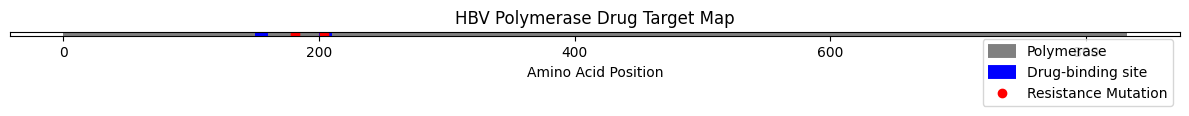

In [7]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import matplotlib.pyplot as plt

# Step 1: Load HBV genome (download NC_003977 from NCBI as GenBank file)
record = SeqIO.read("sequence.gb", "genbank")

# Step 2: Extract polymerase gene (P ORF)
for feature in record.features:
    if feature.type == "CDS" and "polymerase" in feature.qualifiers.get("product", [""])[0].lower():
        poly_feature = feature
        poly_seq = feature.extract(record.seq)
        poly_protein = poly_seq.translate(to_stop=True)
        print(f"\n[✓] Extracted Polymerase Gene")
        print(f"Protein sequence (first 60 aa):\n{poly_protein[:60]}...")
        break

# Step 3: Check for known resistance mutations
# Example: M204V/I, A181T/V (positions in protein sequence)
resistance_mutations = {
    181: ["T", "V"],  # A181T/V
    204: ["V", "I"],  # M204V/I
}
print("\n[🔍] Checking for resistance mutations...")
for pos, bad_aas in resistance_mutations.items():
    if pos <= len(poly_protein):
        aa = poly_protein[pos - 1]
        if aa in bad_aas:
            print(f"⚠️ Resistance mutation found at position {pos}: {aa}")
        else:
            print(f"✅ Position {pos}: {aa} (No resistance)")

# Step 4: Visualization of drug-binding regions (example positions)
drug_binding_sites = [(150, 160), (200, 210)]  # example ranges for visualization

plt.figure(figsize=(12, 1))
plt.hlines(1, 0, len(poly_protein), colors="gray", linewidth=10, label="Polymerase")

# Highlight binding regions
for start, end in drug_binding_sites:
    plt.hlines(1, start, end, colors="blue", linewidth=10, label="Drug-binding site" if start == 150 else "")

# Highlight resistance mutation positions
for pos in resistance_mutations:
    plt.plot(pos, 1, 'ro', label="Resistance Mutation" if pos == 181 else "")

plt.title("HBV Polymerase Drug Target Map")
plt.yticks([])
plt.xlabel("Amino Acid Position")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("hbv_polymerase_map.png")
print("\n[🖼] Visualization saved as hbv_polymerase_map.png")
